#Evoimpy Algorítmo - Tratamento de Valores Ausentes

A **Missing data** é um problema recorrente nas análises dados do mundo real. Quando não tratados de maneira adequada, os resultados finais podem ser seriamente comprometidos. Visando contornar essa questão, os **métodos de imputação** buscam valores plausíveis para preencher esses dados faltantes. Dependendo do desempenho do método, por exemplo, o classificador também tem ganho de performance quando tais analises são aplicadas em tarefas de classificação. O algorítmo em questão foca no cenário da **Classificação Multilabel (CM)**. A CM é um problema de aprendizado supervisionado onde uma instância pode estar associada a múltiplos rótulos,  diferente da classificação tradicional/simples que associa um exemplo a um único, aumentando assim a complexidade. São exemplos de aplicações com CM:  anotações semânticas de vídeos e imagens, categorização de música e diagnósticos médicos. 
O evoimpy é um algorítmo de **Imputação Multipla** de dados baseado em **algoritmos genéticos**. Aqui, os indivíduos (dataset completo, neste caso) são avaliado mediante o desempenho de Classificadores Multilabel. 
Neste notebook é apresentado  a implementação do algorítmo, em Python, utilizando datasets multilabel do repositorio Mulan. Este repositório disponibiliza vários datasets para o cenário pretendido.
No experimento é destribuído percentuais de missing values e verificado o desempenho do Evoimpy.
Como mecanismo de ausência de dados é utilzado *Missing Completely At Random* nos experimentos.

#Importações


In [ ]:
import numpy as np
import scipy as sp
import future as ft
import sklearn
from scipy.io import arff
import pandas as pd

#instalações
!pip install scikit-multilearn
!pip install liac-arff # for loading ARFF files

#importações poś-intalações
from skmultilearn.dataset import load_dataset
import arff


#Lendo datasets originais do Repositório Mulan





In [171]:
from skmultilearn.dataset import load_dataset
X,y,feature_names, label_names = load_dataset('birds', 'undivided')


birds:undivided - does not exists downloading
Downloaded birds-undivided


In [ ]:
X.toarray()
y.toarray()

In [ ]:
feature_names

In [174]:
label_names

[('Brown Creeper', ['0', '1']),
 ('Pacific Wren', ['0', '1']),
 ('Pacific-slope Flycatcher', ['0', '1']),
 ('Red-breasted Nuthatch', ['0', '1']),
 ('Dark-eyed Junco', ['0', '1']),
 ('Olive-sided Flycatcher', ['0', '1']),
 ('Hermit Thrush', ['0', '1']),
 ('Chestnut-backed Chickadee', ['0', '1']),
 ('Varied Thrush', ['0', '1']),
 ('Hermit Warbler', ['0', '1']),
 ("Swainson\\'s Thrush", ['0', '1']),
 ("Hammond\\'s Flycatcher", ['0', '1']),
 ('Western Tanager', ['0', '1']),
 ('Black-headed Grosbeak', ['0', '1']),
 ('Golden Crowned Kinglet', ['0', '1']),
 ('Warbling Vireo', ['0', '1']),
 ("MacGillivray\\'s Warbler", ['0', '1']),
 ("Stellar\\'s Jay", ['0', '1']),
 ('Common Nighthawk', ['0', '1'])]

In [175]:
df_features = pd.DataFrame(X.toarray())
df_labels = pd.DataFrame(y.toarray())
df_labels

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
642,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [176]:
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

In [177]:
from collections import Counter
Counter(combination for row in get_combination_wise_output_matrix(y.A, order=1) for combination in row)

Counter({(0,): 14,
         (1,): 81,
         (2,): 46,
         (3,): 9,
         (4,): 20,
         (5,): 14,
         (6,): 47,
         (7,): 40,
         (8,): 61,
         (9,): 53,
         (10,): 103,
         (11,): 28,
         (12,): 33,
         (13,): 9,
         (14,): 37,
         (15,): 17,
         (16,): 6,
         (17,): 10,
         (18,): 26})

## K-fold = 10

In [ ]:
!pip install iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [178]:

mskf = MultilabelStratifiedKFold(n_splits=10, shuffle=True, random_state=0)

for train_index, test_index in mskf.split(X.toarray(), y.toarray()):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  28  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  54  55  56  58
  59  60  61  62  63  64  65  66  68  69  70  71  72  74  75  77  78  79
  81  82  83  84  85  86  87  89  90  91  92  93  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 132 133 134 135 136 137
 138 139 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 163 164 165 166 167 168 169 170 172 173 174 176 177
 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 204 205 206 208 209 210 211 212 213 214 215
 216 217 218 219 220 222 223 224 226 227 228 229 230 231 232 233 234 235
 236 238 240 241 242 243 244 245 247 248 249 250 251 252 253 254 255 256
 257 258 259 260 261 262 263 264 265 266 267

#Exibindo informações do dataset trabalhado

In [179]:
f =np.array(feature_names)
features = pd.DataFrame(f)
features_x = features = features.iloc[:,0]
features_x


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


0            audio-ssd1
1            audio-ssd2
2            audio-ssd3
3            audio-ssd4
4            audio-ssd5
             ...       
255     std_rect_height
256    mean_rect_volume
257     std_rect_volume
258         hasSegments
259            location
Name: 0, Length: 260, dtype: object

In [180]:
dX_train = X_train.toarray()
dy_train = y_train.toarray() 
dX_train


#print(pd.DataFrame(X.toarray()).astype(float))

array([[1.65210000e-02, 3.99260000e-02, 8.96320000e-02, ...,
        1.76180218e+03, 1.00000000e+00, 2.00000000e+00],
       [6.60000000e-03, 3.59840000e-02, 8.99560000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [6.89400000e-03, 1.77220000e-02, 4.80620000e-02, ...,
        1.13137085e+02, 1.00000000e+00, 2.00000000e+00],
       ...,
       [3.74320000e-02, 1.04400000e-02, 2.10090000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+00],
       [2.00058000e-01, 5.47870000e-02, 1.37048000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+00],
       [8.69700000e-03, 1.20310000e-02, 2.12120000e-02, ...,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+00]])

In [181]:
df = pd.DataFrame(dX_train)
dfy = pd.DataFrame(dy_train)
df_origin = df
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
0,0.016521,0.039926,0.089632,0.134119,0.170470,0.176872,0.171546,0.182392,0.162482,0.159083,0.164531,0.163366,0.171633,0.219787,0.270805,0.339206,0.327098,0.264581,0.173363,0.131426,0.068158,0.001216,0.000493,0.001114,0.003419,0.004479,0.004231,0.004013,0.003757,0.003314,0.003246,0.002308,0.002129,0.001777,0.002338,0.002030,0.003741,0.005809,0.006852,0.004594,...,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,13.0,16.384615,20.617394,46.769231,71.863118,788.923077,1761.802180,1.0,2.0
1,0.006600,0.035984,0.089956,0.123214,0.172273,0.177068,0.165507,0.179655,0.161744,0.163678,0.161606,0.159523,0.171042,0.217206,0.254929,0.307129,0.293592,0.242930,0.151817,0.105817,0.062566,0.001245,0.000118,0.000972,0.003037,0.004070,0.004311,0.004704,0.003967,0.003847,0.002940,0.002346,0.002030,0.001950,0.002063,0.002207,0.002420,0.002521,0.001875,0.001428,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
2,0.006894,0.017722,0.048062,0.065802,0.103443,0.091397,0.084931,0.088666,0.075676,0.074408,0.074683,0.083202,0.088820,0.125175,0.165580,0.212101,0.217109,0.153888,0.099709,0.074910,0.045928,0.001095,0.000125,0.000368,0.001433,0.002134,0.002286,0.001869,0.001417,0.001420,0.001047,0.000855,0.000764,0.000865,0.000837,0.001438,0.002761,0.005301,0.005453,0.000806,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.0,24.000000,2.828427,28.000000,1.414214,674.000000,113.137085,1.0,2.0
3,0.031046,0.127675,0.221428,0.272707,0.358743,0.349389,0.316029,0.330656,0.310752,0.306288,0.300054,0.304569,0.295422,0.367728,0.398225,0.457381,0.429034,0.330248,0.213530,0.131256,0.075369,0.001508,0.000894,0.005276,0.008511,0.010244,0.010371,0.009083,0.008407,0.006876,0.006512,0.005826,0.004873,0.004481,0.004114,0.004384,0.004423,0.004448,0.002896,0.002198,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
4,0.064721,0.226644,0.304482,0.274662,0.346980,0.334063,0.307223,0.324666,0.297070,0.292258,0.287987,0.289535,0.286109,0.354479,0.389812,0.444778,0.407931,0.312861,0.197836,0.122053,0.069657,0.001287,0.002601,0.015984,0.014081,0.008860,0.009464,0.008694,0.007648,0.007977,0.006727,0.005021,0.004376,0.004248,0.004151,0.004636,0.004249,0.004037,0.002778,0.001979,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.179147,0.006886,0.015871,0.023817,0.038627,0.037004,0.036252,0.039497,0.034407,0.034986,0.041187,0.050917,0.061310,0.096372,0.148460,0.262028,0.246051,0.176690,0.105253,0.066403,0.039532,0.001074,0.029440,0.000091,0.000332,0.000542,0.000716,0.000558,0.000510,0.000476,0.000378,0.000344,0.000345,0.000424,0.000697,0.002066,0.006039,0.021735,0.011000,0.005959,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,8.0,36.

In [182]:
va = df.isna().sum()
va

0      0
1      0
2      0
3      0
4      0
      ..
255    0
256    0
257    0
258    0
259    0
Length: 260, dtype: int64

padronização Dataset de teste

In [183]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X_test = scl.fit_transform(X_test.toarray())

In [184]:
X_test

array([[-0.49383281, -0.26081303,  0.22294006, ..., -0.43629527,
        -0.98473193, -1.59020465],
       [ 5.27822809, -0.22628217, -0.22710335, ...,  0.28708429,
         1.0155048 , -0.39869684],
       [-0.0346086 ,  0.15686974,  0.28806941, ...,  0.06726874,
         1.0155048 , -0.39869684],
       ...,
       [ 0.17647579, -0.03651472, -0.06815397, ..., -0.19144568,
         1.0155048 ,  1.68644182],
       [-0.12009145, -0.43589483, -0.72717503, ..., -0.43629527,
        -0.98473193,  0.19705706],
       [-0.1313602 , -0.40416376, -0.6411166 , ..., -0.43629527,
        -0.98473193,  0.19705706]])

##Amputando dataset

*   Mecanismo VA: MCAR



Quantificando os percentuais de valores ausentes de acordo com cada database

In [185]:
#rate - taxa de Missing values - em float (ex.: 0.5 == 50%)
#data_size = quantidade de dados na matriz (col*rows)
def amount_ampute(rate, data_size):
  amount_missing_values = data_size * rate
  return int(amount_missing_values)


In [186]:
#quantidade total de dados de treinamento (total = linhas*colunas)
amount = dX_train.size
amount_mv = amount_ampute(0.10, amount)
print('Total de dados: ',amount,'\n Total de Valores Ausentes: ',amount_mv)


Total de dados:  150800 
 Total de Valores Ausentes:  15080


Adicionado amputações de acordo com a quantidade estabelecida no passo anterior

In [187]:
from numpy import random
def selectIndex(x,y):
  return random.randint(0,x), random.randint(0,y)

In [188]:
cols = X_train.shape[0]
cols

580

In [189]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
0,0.016521,0.039926,0.089632,0.134119,0.170470,0.176872,0.171546,0.182392,0.162482,0.159083,0.164531,0.163366,0.171633,0.219787,0.270805,0.339206,0.327098,0.264581,0.173363,0.131426,0.068158,0.001216,0.000493,0.001114,0.003419,0.004479,0.004231,0.004013,0.003757,0.003314,0.003246,0.002308,0.002129,0.001777,0.002338,0.002030,0.003741,0.005809,0.006852,0.004594,...,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.153846,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,13.0,16.384615,20.617394,46.769231,71.863118,788.923077,1761.802180,1.0,2.0
1,0.006600,0.035984,0.089956,0.123214,0.172273,0.177068,0.165507,0.179655,0.161744,0.163678,0.161606,0.159523,0.171042,0.217206,0.254929,0.307129,0.293592,0.242930,0.151817,0.105817,0.062566,0.001245,0.000118,0.000972,0.003037,0.004070,0.004311,0.004704,0.003967,0.003847,0.002940,0.002346,0.002030,0.001950,0.002063,0.002207,0.002420,0.002521,0.001875,0.001428,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
2,0.006894,0.017722,0.048062,0.065802,0.103443,0.091397,0.084931,0.088666,0.075676,0.074408,0.074683,0.083202,0.088820,0.125175,0.165580,0.212101,0.217109,0.153888,0.099709,0.074910,0.045928,0.001095,0.000125,0.000368,0.001433,0.002134,0.002286,0.001869,0.001417,0.001420,0.001047,0.000855,0.000764,0.000865,0.000837,0.001438,0.002761,0.005301,0.005453,0.000806,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.0,24.000000,2.828427,28.000000,1.414214,674.000000,113.137085,1.0,2.0
3,0.031046,0.127675,0.221428,0.272707,0.358743,0.349389,0.316029,0.330656,0.310752,0.306288,0.300054,0.304569,0.295422,0.367728,0.398225,0.457381,0.429034,0.330248,0.213530,0.131256,0.075369,0.001508,0.000894,0.005276,0.008511,0.010244,0.010371,0.009083,0.008407,0.006876,0.006512,0.005826,0.004873,0.004481,0.004114,0.004384,0.004423,0.004448,0.002896,0.002198,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
4,0.064721,0.226644,0.304482,0.274662,0.346980,0.334063,0.307223,0.324666,0.297070,0.292258,0.287987,0.289535,0.286109,0.354479,0.389812,0.444778,0.407931,0.312861,0.197836,0.122053,0.069657,0.001287,0.002601,0.015984,0.014081,0.008860,0.009464,0.008694,0.007648,0.007977,0.006727,0.005021,0.004376,0.004248,0.004151,0.004636,0.004249,0.004037,0.002778,0.001979,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.179147,0.006886,0.015871,0.023817,0.038627,0.037004,0.036252,0.039497,0.034407,0.034986,0.041187,0.050917,0.061310,0.096372,0.148460,0.262028,0.246051,0.176690,0.105253,0.066403,0.039532,0.001074,0.029440,0.000091,0.000332,0.000542,0.000716,0.000558,0.000510,0.000476,0.000378,0.000344,0.000345,0.000424,0.000697,0.002066,0.006039,0.021735,0.011000,0.005959,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,8.0,36.

In [190]:
#rows e cols são os tamanhos dos ranges percorridos para x e y
rows = X_train.shape[0]
cols = X_train.shape[1]
indexList = []

for i in range(amount_mv):
  r,c= selectIndex(rows,cols)
  df.iloc[r,c] = np.nan
  indexList.append([r,c])

In [191]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
0,0.016521,0.039926,0.089632,0.134119,NaN,0.176872,0.171546,0.182392,0.162482,0.159083,0.164531,0.163366,NaN,0.219787,0.270805,0.339206,0.327098,0.264581,0.173363,0.131426,0.068158,0.001216,0.000493,0.001114,0.003419,0.004479,0.004231,0.004013,0.003757,0.003314,0.003246,0.002308,NaN,0.001777,0.002338,0.002030,0.003741,0.005809,0.006852,0.004594,...,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.153846,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000,13.0,16.384615,20.617394,NaN,NaN,788.923077,1761.802180,1.0,2.0
1,0.006600,0.035984,0.089956,NaN,0.172273,0.177068,0.165507,0.179655,0.161744,NaN,0.161606,0.159523,0.171042,0.217206,0.254929,0.307129,0.293592,0.242930,0.151817,0.105817,0.062566,0.001245,NaN,0.000972,0.003037,0.004070,0.004311,0.004704,NaN,0.003847,0.002940,0.002346,NaN,0.001950,0.002063,0.002207,0.002420,0.002521,0.001875,0.001428,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,2.0
2,0.006894,0.017722,0.048062,0.065802,0.103443,0.091397,0.084931,0.088666,NaN,0.074408,0.074683,0.083202,0.088820,0.125175,0.165580,0.212101,0.217109,0.153888,NaN,0.074910,0.045928,NaN,0.000125,0.000368,0.001433,0.002134,0.002286,0.001869,0.001417,0.001420,NaN,0.000855,0.000764,0.000865,0.000837,0.001438,0.002761,0.005301,0.005453,0.000806,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.0,NaN,2.828427,NaN,1.414214,NaN,113.137085,1.0,2.0
3,NaN,0.127675,0.221428,0.272707,0.358743,NaN,0.316029,0.330656,0.310752,0.306288,0.300054,0.304569,0.295422,0.367728,0.398225,0.457381,0.429034,0.330248,0.213530,0.131256,NaN,0.001508,0.000894,0.005276,0.008511,0.010244,0.010371,0.009083,0.008407,0.006876,0.006512,0.005826,NaN,0.004481,0.004114,0.004384,0.004423,0.004448,0.002896,0.002198,...,0.000000,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0,0.000000,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,2.0
4,0.064721,NaN,0.304482,NaN,0.346980,0.334063,0.307223,NaN,0.297070,0.292258,0.287987,0.289535,0.286109,0.354479,0.389812,0.444778,0.407931,0.312861,0.197836,0.122053,0.069657,0.001287,0.002601,0.015984,0.014081,0.008860,0.009464,NaN,0.007648,0.007977,0.006727,0.005021,0.004376,0.004248,0.004151,NaN,0.004249,0.004037,0.002778,0.001979,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.000,0.0,0.000000,0.000000,0.000,0.000000,NaN,0.000000,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,0.179147,0.006886,0.015871,0.023817,0.038627,NaN,0.036252,0.039497,0.034407,0.034986,0.041187,0.050917,0.061310,0.096372,0.148460,0.262028,0.246051,0.176690,NaN,0.066403,0.039532,0.001074,0.029440,0.000091,0.000332,0.000542,0.000716,0.000558,0.000510,0.000476,0.000378,0.000344,0.000345,0.000424,0.000697,0.002066,0.006039,0.021735,0.011000,0.005959,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.125,8.0,36.125000,64.922069,27.125,40.704729,1131.375000,3191.526574,1.0,6.0
576,0.190918,0.008894,0.018812,0.034375,0.050993,0.043364,0.040725,0.042285,0.035883,0.036860,NaN,0.0484

In [51]:
#indices dos missing values
#indexList[0]
#for i in indexList:
#  df.iloc[indexList[0][0],indexList[0][1]] = np.nan

In [ ]:
#df com missiing values
df

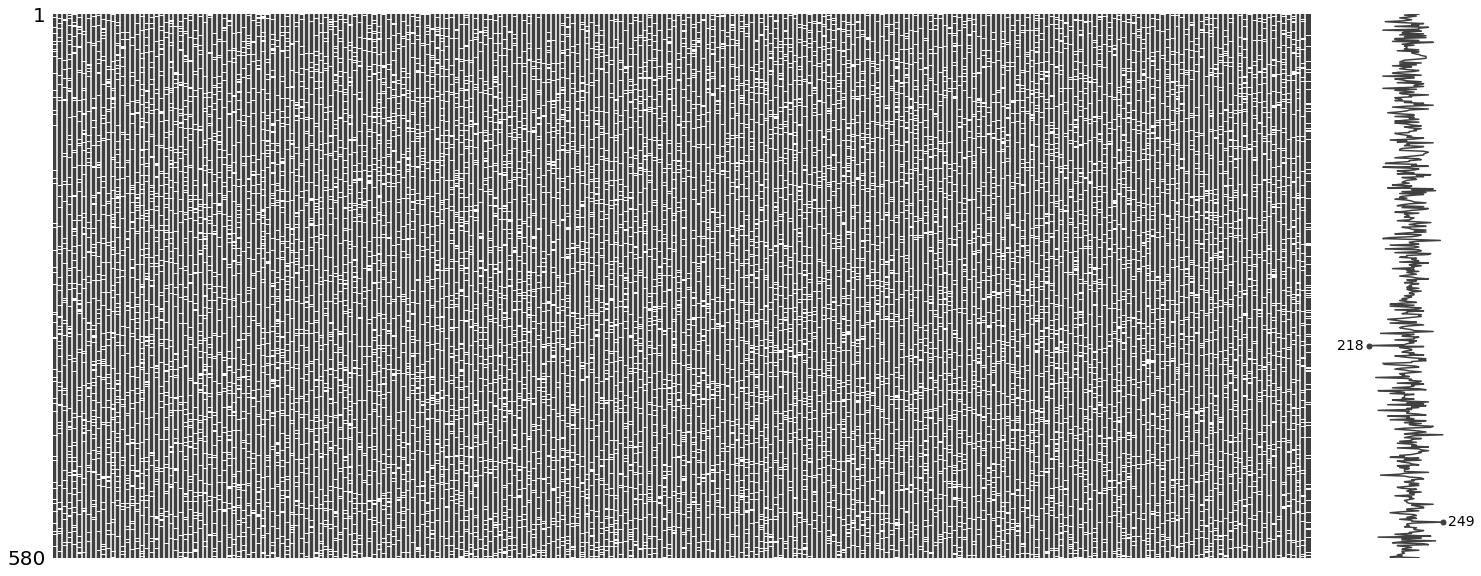

In [193]:
#visualizando missing values
import missingno as msno
msno.matrix(df)

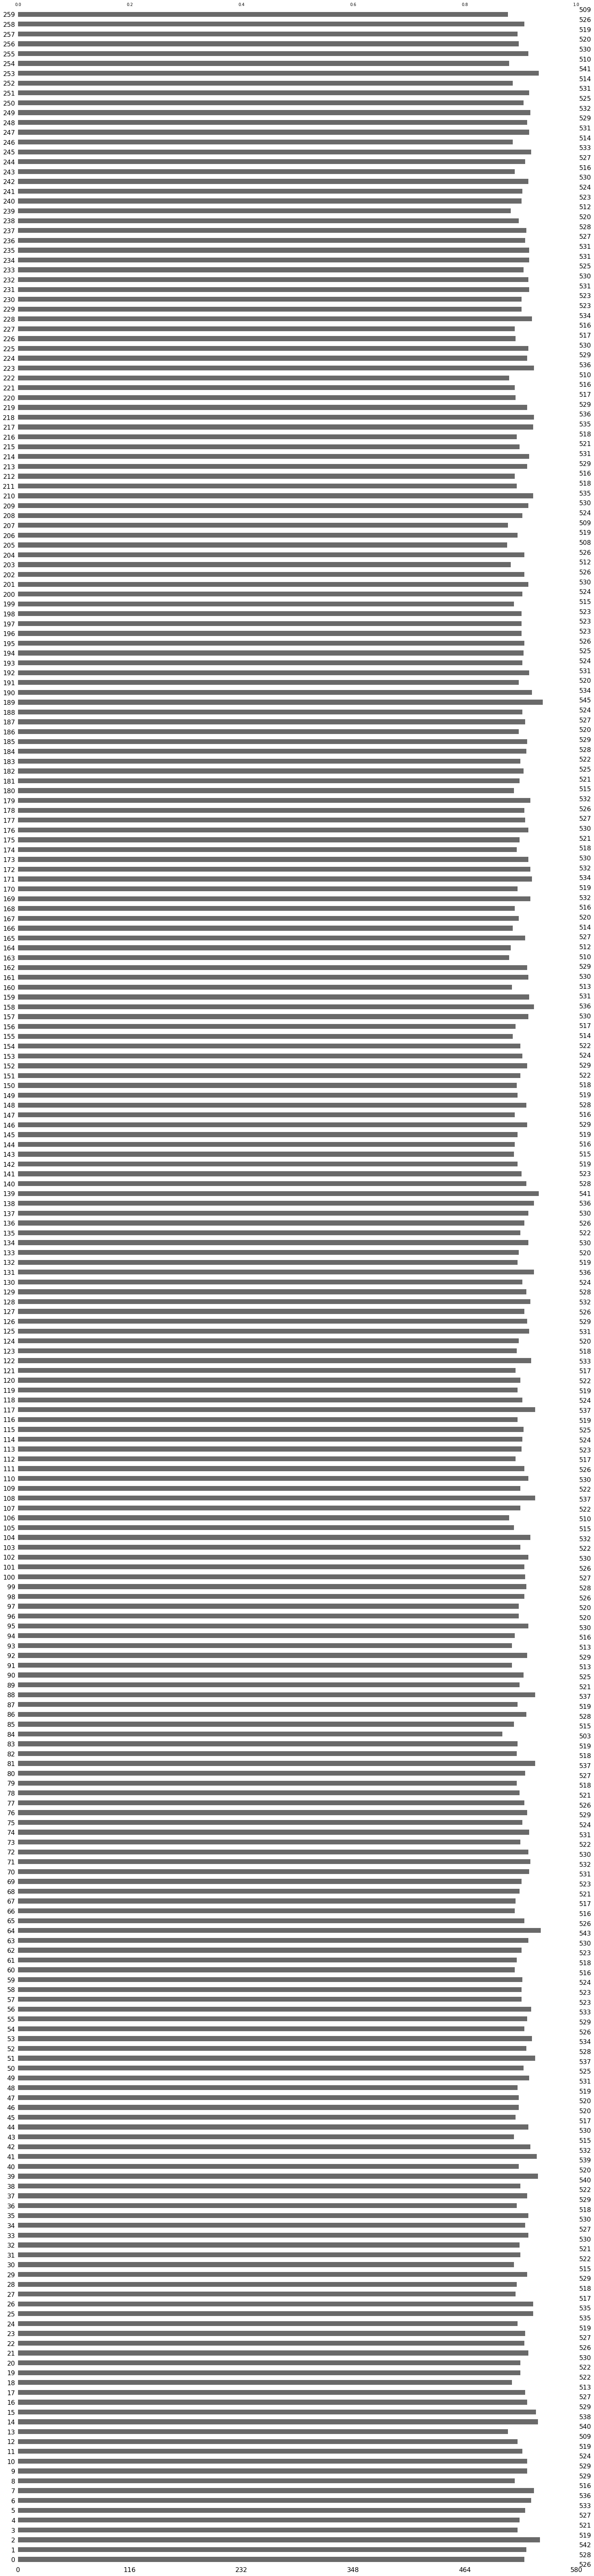

In [194]:
msno.bar(df)

In [195]:
missing_values = df.isna().sum()
missing_values

0      54
1      52
2      38
3      61
4      59
       ..
255    50
256    60
257    61
258    54
259    71
Length: 260, dtype: int64

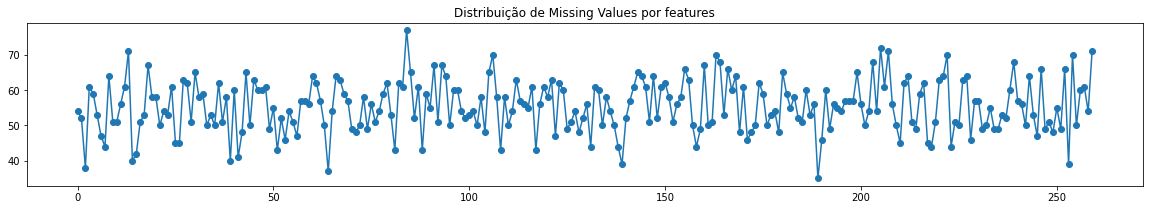

In [196]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,3))
plt.plot(missing_values,marker='o')


plt.title("Distribuição de Missing Values por features")
plt.show()

In [ ]:
df.describe()


In [198]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259
0,0.016521,0.039926,0.089632,0.134119,NaN,0.176872,0.171546,0.182392,0.162482,0.159083,0.164531,0.163366,NaN,0.219787,0.270805,0.339206,0.327098,0.264581,0.173363,0.131426,0.068158,0.001216,0.000493,0.001114,0.003419,0.004479,0.004231,0.004013,0.003757,0.003314,0.003246,0.002308,NaN,0.001777,0.002338,0.002030,0.003741,0.005809,0.006852,0.004594,...,0.230769,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.153846,0.0,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,13.0,16.384615,20.617394,NaN,NaN,788.923077,1761.80218,1.0,2.0
1,0.006600,0.035984,0.089956,NaN,0.172273,0.177068,0.165507,0.179655,0.161744,NaN,0.161606,0.159523,0.171042,0.217206,0.254929,0.307129,0.293592,0.242930,0.151817,0.105817,0.062566,0.001245,NaN,0.000972,0.003037,0.004070,0.004311,0.004704,NaN,0.003847,0.002940,0.002346,NaN,0.001950,0.002063,0.002207,0.002420,0.002521,0.001875,0.001428,...,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,2.0


In [59]:
#Instalando o panda profile
#!pip install pandas-profiling
#from pandas_profiling import ProfileReport

#Imputação de dados


*   k-Nearest Neighbors (kNN) Imputation
*   Random Forest Imputation (MissForest)
*   mean
*   most_frequent
*   median







Library Missingpy

**missingpy** is a library for missing data imputation in Python. It has an API consistent with scikit-learn, so users already comfortable with that interface will find themselves in familiar terrain. Currently, the library supports k-Nearest Neighbors based imputation and Random Forest based imputation (MissForest) but we plan to add other imputation tools in the future so please stay tuned!

In [81]:
#installing
!pip install missingpy

Criação da popoulação inicial

imputando os indivíduos

In [84]:
#!pip install -U scikit-learn

In [100]:
#!pip install sklearn
#import sklearn
#from sklearn import neighbors

In [199]:
import sklearn.neighbors._base
import sys

sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [200]:
from sklearn.impute import SimpleImputer

In [201]:
def knnImp(dataset_amputed):
  from missingpy import KNNImputer
  imputer_knn = KNNImputer(missing_values="NaN", n_neighbors=5, weights="uniform", 
                 metric="masked_euclidean", row_max_missing=0.5, 
                 col_max_missing=0.8, copy=True)
  
  X_imputed_KNNI = imputer_knn.fit_transform(dataset_amputed)
  return X_imputed_KNNI

In [202]:
def rfImp(dataset_amputed):
  from missingpy import MissForest
  imputer_RFI = MissForest()
  X_imputed_RFI = imputer_RFI.fit_transform(dataset_amputed)
  return X_imputed_RFI

In [203]:
def meanImp(dataset_amputed):
  imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
  imputer_mean=imputer_mean.fit(dataset_amputed)
  X_imputed_mean = imputer_mean.transform(dataset_amputed)
  return X_imputed_mean

In [204]:
def mostFrequentImp(dataset_amputed):
  imputer_most_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imputer_most_frequent=imputer_most_frequent.fit(dataset_amputed)
  X_imputed_most_frequent=imputer_most_frequent.transform(dataset_amputed)
  return X_imputed_most_frequent

In [205]:
def medianImp(dataset_amputed):
  imputer_median = SimpleImputer(missing_values=np.nan, strategy='median')
  imputer_median=imputer_median.fit(df_median)
  X_imputed_median=imputer_median.transform(df_median)
  return X_imputed_median

Padronização dos dados

In [206]:
df_Mean = df
df_median = df
df_Most_frequent = df
df_kNN = df
df_RF = df

In [207]:
ind1 =  meanImp(df_Mean)
ind2 =  medianImp(df_median)
ind3 =  mostFrequentImp(df_Most_frequent)


In [ ]:

#ind4 =  rfImp(df_RF)


In [143]:
#df_KNN = df_kNN.values
#df_KNN

array([[0.034741, 0.089665,      nan, ..., 0.245457, 0.105065, 0.405399],
       [0.081374, 0.272747, 0.085733, ..., 0.343547, 0.276366, 0.710924],
       [0.110545, 0.273567, 0.08441 , ..., 0.188693, 0.045941, 0.457372],
       ...,
       [0.035169, 0.065403, 0.075227, ...,      nan, 0.247136, 0.476993],
       [0.054276, 0.238158, 0.095935, ..., 0.547126, 0.183494, 1.25582 ],
       [0.073194, 0.140733, 0.080545, ..., 0.087328, 0.236815, 0.451701]])

In [145]:
#df_KNN.shape

(530, 72)

In [158]:
#ind5 =  knnImp(df)

TypeError: ignored

In [255]:
#dataset_amputed - base já com valores ausentes
#imputation_type - list de métodos de iputação simples ['kNN', 'RF', 'mean', 'most_frequent', 'median']
#imputations = ['kNN', 'RF', 'mean', 'most_frequent', 'median']
#dfs = ['df_kNN', 'df_RF', 'df_Mean', 'df_Most_frequent', 'df_median']

#cópias do database aputudo para cada método no formação da pop. inicial









populationInitial = [ind1, ind2, ind3]


In [256]:
len(populationInitial)

3

Normmalização da população inicial

In [257]:
populationInitialScale = []
for i in range(len(populationInitial)):
  scaler = StandardScaler()
  populationInitialScale.append(scaler.fit_transform(populationInitial[i]))

In [258]:
populationInitialScale

[array([[-5.22670325e-01, -2.28752283e-01, -8.45704924e-02, ...,
         -1.50830760e-01,  1.07840781e+00, -1.04018599e+00],
        [-6.24090769e-01, -2.65645995e-01, -8.17187496e-02, ...,
         -3.43951894e-01, -1.02249037e+00, -1.04018599e+00],
        [-6.21085265e-01, -4.36562526e-01, -4.50456140e-01, ...,
         -3.31550296e-01,  1.07840781e+00, -1.04018599e+00],
        ...,
        [-3.08901260e-01, -5.04715751e-01, -6.88567866e-01, ...,
         -3.43951894e-01, -1.02249037e+00, -1.16111163e-15],
        [ 1.35359255e+00, -8.96661718e-02,  3.32769750e-01, ...,
         -3.43951894e-01,  6.99739658e-16,  2.67109489e-01],
        [-6.02653548e-01, -4.89825366e-01, -6.86781126e-01, ...,
         -3.43951894e-01, -1.02249037e+00,  2.67109489e-01]]),
 array([[-0.4774538 , -0.19092943, -0.0518959 , ..., -0.11402352,
          1.125     , -1.03267835],
        [-0.57804319, -0.22757566, -0.04906513, ..., -0.30607848,
         -0.88888889, -1.03267835],
        [-0.57506231, -0.

Avaliação da População Inicial

Os indivíduos da população são avaliados no aprendizado multirrótulo.
Neste experimento, serão testados algorítmos que transformam o problema e algorítmos que adaptam o problema.

In [262]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

def evaluation_binaryRelevance(core_algorithm, individual):
  if core_algorithm == 'svm':
    classifier_br = BinaryRelevance(
    classifier=SVC(C=50.0))
    classifier_br.fit(individual, y_train)
    prediction_br = classifier_br.predict(X_test)

    F1 = f1_score(y_test, prediction_br, average='micro')
    ACC = accuracy_score(y_test, prediction_br)
    HL = hamming_loss(y_test, prediction_br)

  elif core_algorithm == 'randomForest':
    classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
    classifier.fit(individual, y_train)
    prediction_br_RFC=classifier.predict(X_test)

    F1 = f1_score(y_test, prediction_br_RFC, average='micro')
    ACC = accuracy_score(y_test, prediction_br_RFC)
    HL = hamming_loss(y_test, prediction_br_RFC)
  return  F1, ACC, HL

In [266]:

print('Avaliações com Binary Relevance\n')
for i in range(len(populationInitial)):
  print('Individual - ',i)
  F_svm,A_svm,H_svm = evaluation_binaryRelevance('svm', populationInitialScale[i])
  F_RF,A_RF,H_RF = evaluation_binaryRelevance('randomForest', populationInitialScale[i])
  print(A_svm,F_svm,H_svm)
  print(A_RF,F_RF,H_RF)
  print('----------------------------------------------------')


Avaliações com Binary Relevance

Individual -  0
0.5076923076923077 0.4536082474226804 0.04291497975708502
0.5384615384615384 0.46341463414634143 0.03562753036437247
----------------------------------------------------
Individual -  1
0.47692307692307695 0.4081632653061224 0.04696356275303644
0.46153846153846156 0.5 0.03724696356275304
----------------------------------------------------
Individual -  2
0.49230769230769234 0.44 0.045344129554655874
0.49230769230769234 0.4050632911392405 0.03805668016194332
----------------------------------------------------


In [ ]:
acuracias

In [ ]:
s = X_train.toarray()
s.shape

In [ ]:
sc = StandardScaler()
sc = sc.fit_transform(X_train.toarray())
F,A,H = evaluation_binaryRelevance('randomForest', sc)
FS,AS,HS = evaluation_binaryRelevance('svm', sc)
print(F,A,H)
print(FS,AS,HS)

#Feature Scaling

In [ ]:
#Já implementado, ainda não aplicado

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler_dataset_original = StandardScaler()
scaler_imputed_KNNI = StandardScaler()
scaler_imputed_RFI = StandardScaler()
scaler_imputed_mean = StandardScaler()
scaler_imputed_most_frequent = StandardScaler()
scaler_imputed_median = StandardScaler()

X_dataset_original = scaler_dataset_original.fit_transform(dataset_original)
X_imputed_KNNI_ = scaler_imputed_KNNI.fit_transform(X_imputed_KNNI)
X_imputed_RFI_ = scaler_imputed_RFI.fit_transform(X_imputed_RFI)
X_imputed_mean_ = scaler_imputed_mean.fit_transform(X_imputed_mean)
X_imputed_most_frequent_ = scaler_imputed_most_frequent.fit_transform(X_imputed_most_frequent)
X_imputed_median_ = scaler_imputed_median.fit_transform(X_imputed_median)





In [ ]:
X_dataset_original

In [ ]:
#Festure testing in dataset test
df_X_test = pd.DataFrame(X_test.toarray())
from sklearn.preprocessing import StandardScaler
scaler_dataset_original_test = StandardScaler()
X_dataset_test = scaler_dataset_original_test.fit_transform(df_X_test)


##Exibindo informações pós split

In [ ]:
#X_train.get_shape(), y_train.get_shape()

In [ ]:

#plt.hist(df_x.iloc[:,71])
#plt.figure(figsize=(505,10))
#plt.autoscale(enable=True)

#plt.title("Médias de x")
#plt.show()

In [ ]:
#fig, (ax1, ax2) = plt.subplots(2)
#fig.suptitle('Axes values are scaled individually by default')
#ax1.hist(df_x.iloc[:,71])
#ax2.hist(df_x.iloc[:,70])

In [ ]:
#from skmultilearn.model_selection.measures import get_combination_wise_output_matrix
#from collections import Counter
#map =pd.DataFrame({
#    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train.A, order=1) for combination in row),
#    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test.A, order=1) for combination in row)
#}).T.fillna(0.0)

In [ ]:
#print(map)

[('amazed-suprised', ['0', '1']),
 ('happy-pleased', ['0', '1']),
 ('relaxing-calm', ['0', '1']),
 ('quiet-still', ['0', '1']),
 ('sad-lonely', ['0', '1']),
 ('angry-aggresive', ['0', '1'])]


 print(X_test[:2]), feature_names[:3], label_names[:]

#Classificação MultiLabel

##Multilabel Classifiers - Problem Transformation

In [ ]:
avaliacoes = {} 

Classificação com Binary Relevance (BR) - Parametro SVM



In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
classifier_br = BinaryRelevance(
classifier=SVC(C=50.0))
classifier_br.fit(X_dataset_original, y_train)
prediction_br = classifier_br.predict(X_dataset_test)

ACC_BR_SVM = metrics.accuracy_score(y_test, prediction_br)
HL_BR_SVM = metrics.hamming_loss(y_test, prediction_br)
FS_BR_SVM = metrics.f1_score(y_test, prediction_br, average='micro')

avaliacoes["ACC_BR_SVM"] = ACC_BR_SVM
avaliacoes["HL_BR_SVM"] = HL_BR_SVM
avaliacoes["FS_BR_SVM"] = FS_BR_SVM

Classificação com Binary Relevance (BR) - Parametro Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = BinaryRelevance(classifier = RandomForestClassifier(),require_dense = [False, True])
classifier.fit(X_dataset_original, y_train)
prediction_br_RFC=classifier.predict(X_dataset_test)

ACC_BR_RFC = metrics.accuracy_score(y_test, prediction_br_RFC)
HL_BR_RFC = metrics.hamming_loss(y_test, prediction_br_RFC)
FS_BR_RFC = metrics.f1_score(y_test, prediction_br_RFC, average='micro')

avaliacoes["ACC_BR_RFC"] = ACC_BR_RFC
avaliacoes["HL_BR_RFC"] = HL_BR_RFC
avaliacoes["FS_BR_RFC"] = FS_BR_RFC


Classificação com LabelPowerset - Parametro Random Forest

In [ ]:
from skmultilearn.problem_transform import LabelPowerset
classifier = LabelPowerset(classifier = RandomForestClassifier(), require_dense = [False, True])
classifier.fit(X_dataset_original, y_train)
prediction_LP_RFC=classifier.predict(X_dataset_test)

ACC_LP_RFC = metrics.accuracy_score(y_test, prediction_LP_RFC)
HL_LP_RFC = metrics.hamming_loss(y_test, prediction_LP_RFC)
FS_LP_RFC = metrics.f1_score(y_test, prediction_LP_RFC, average='micro')

avaliacoes["ACC_LP_RFC"] = ACC_LP_RFC
avaliacoes["HL_LP_RFC"] = HL_LP_RFC
avaliacoes["FS_LP_RFC"] = FS_LP_RFC

Classificação com Classifier Chain - Parametro Random Forest

In [ ]:
from skmultilearn.problem_transform import ClassifierChain

classifier = ClassifierChain(classifier = RandomForestClassifier(),require_dense = [False, True],order=[i for i in range(6)])
classifier.fit(X_dataset_original,y_train)
predict_CC_RFC =classifier.predict(X_dataset_test)

ACC_CC_RFC = metrics.accuracy_score(y_test, predict_CC_RFC)
HL_CC_RFC = metrics.hamming_loss(y_test, predict_CC_RFC) 
FS_CC_RFC = metrics.f1_score(y_test, predict_CC_RFC, average='micro')

avaliacoes["ACC_CC_RFC"] = ACC_CC_RFC
avaliacoes["HL_CC_RFC"] = HL_CC_RFC
avaliacoes["FS_CC_RFC"] = FS_CC_RFC



In [ ]:
#?? classifier_br

##Multilabel Classifiers - Algorithm Adaptation

In [ ]:
from skmultilearn.adapt import BRkNNaClassifier
from sklearn.model_selection import GridSearchCV
parameters = {'k': range(3,5)}
score = 'f1_micro'
classifier = GridSearchCV(BRkNNaClassifier(), parameters, scoring=score)
classifier.fit(X_dataset_original, y_train)

print('best parameters :', classifier.best_params_,'best score: ',classifier.best_score_)

prediction_BRkNNaClassifier = classifier.predict(X_dataset_test)

ACC_BRKNN = metrics.accuracy_score(y_test, prediction_BRkNNaClassifier)
HL_BRKNN = metrics.hamming_loss(y_test, prediction_BRkNNaClassifier) 
FS_BRKNN = metrics.f1_score(y_test, prediction_BRkNNaClassifier, average='micro')
print(ACC_BRKNN, HL_BRKNN, FS_BRKNN)
avaliacoes["ACC_BRKNN"] = ACC_BRKNN
avaliacoes["HL_BRKNN"] = HL_BRKNN
avaliacoes["FS_BRKNN"] = FS_BRKNN

Classificação com KNN
*   3-vizinhos mais próximos







In [ ]:

classifier_mlknn = MLkNN(k=5, s=0.5)
prediction_mlknn = classifier_mlknn.fit(X_dataset_original, y_train).predict(X_dataset_test)
ACC_MLKNN = metrics.accuracy_score(y_test, prediction_mlknn)
HL_MLKNN = metrics.hamming_loss(y_test, prediction_mlknn) 
FS_MLKNN = metrics.f1_score(y_test, prediction_mlknn, average='micro')
print(ACC_MLKNN, HL_MLKNN, FS_MLKNN)
avaliacoes["ACC_MLKNN"] = ACC_MLKNN
avaliacoes["HL_MLKNN"] = HL_MLKNN
avaliacoes["FS_MLKNN"] = FS_MLKNN

In [ ]:
avaliacoes 

##Algoritmp Genético

Propriedades do Algoritmo


*   Seleção: Torneio (size = 2)
*   Crossover: 2-pontos 
*   Elitismo: 1
*   Gerações: 7
*   Indivíduos por geração = {5, 10, 25, 50, 25, 10, 5}
*   Percentuais de amputação = {0.05, 0.10, 0.15, 0.20, 0.25}
*   Técnicas de imputação  = {knn, RF, Mean, Most_frequent, median}
*   bases para a utilização = emotions, ..., ??

População Inicial 

  5 bases completas
Indivíduos da população inicial


> df_kNN
> df_RF
> df_Mean
> df_Most_frequent
> df_median







In [ ]:
#indivíduos da população inicial
df_kNN
df_RF
df_Mean
df_Most_frequent
df_median

##Seleção 

##Cruzamento

##Mutação